In [3]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

#import dataset
data = pd.read_csv('/content/drive/MyDrive/BANGKIT/myflights_datasets.csv', sep=';')
data.head()

,days,date,time,aircraft_id,airline,airport_dep,airport_arrival,duration_of_flight,temperature,percentage_wind,percentage_cloud,status
0,Tuesday,23/05/2023,23:34,LNI591,Lion Air,WARR,WIII,75,25,10,32,On time
1,Tuesday,23/05/2023,23:28,LNI646,Lion Air,WARR,WADL,60,25,10,32,On time
2,Tuesday,23/05/2023,23:24,LNI708,Lion Air,WARR,WAAA,120,25,10,32,On time
3,Tuesday,23/05/2023,23:14,LNI266,Lion Air,WARR,WALL,100,25,10,32,Delay (10 - 30 menit)
4,Tuesday,23/05/2023,23:07,LNI690,Lion Air,WARR,WATT,125,25,10,32,Delay (10 - 30 menit)


In [4]:
#Connecting Google Drive with Google Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pre-Processing Data

In [5]:
#Divides the columns in a DataFrame into two categories: numeric and non-numeric.
import pandas as pd

def separate_columns(df):
    numerical_cols = df.select_dtypes(include='number').columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    return numerical_cols, categorical_cols
num, nonnum = separate_columns(data)


In [6]:
#Takes a unique value from the 'status' column in a DataFrame
data['status'].unique()

array(['On time', 'Delay (10 - 30 menit)', 'Delay (30 - 60 menit)',
       'Delay < 10 menit'], dtype=object)

In [7]:
#Provide the code in the 'status' column
import pandas as pd

def encode_status(df):
    mapping = {
        'On time': 0,
        'Delay (10 - 30 menit)': 1,
        'Delay (30 - 60 menit)': 2,
        'Delay < 10 menit': 3
    }
    encoded_df = df.copy()
    encoded_df['status'] = encoded_df['status'].map(mapping)
    return encoded_df
y_train=encode_status(data)
y_train=y_train['status']
print(y_train)


0      0
1      0
2      0
3      1
4      1
      ..
641    0
642    2
643    1
644    1
645    1
Name: status, Length: 646, dtype: int64


In [8]:
#Takes a subset of the DataFrame data consisting only of numeric (num) columns, and stores them in the X_train variable
X_train=data[num]

In [9]:
#Performing feature scaling on the DataFrame X_train using the Min-Max Scaling method.
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def feature_scaling(df):
    numerical_cols = df.select_dtypes(include='number').columns.tolist()
    scaler = MinMaxScaler()
    scaled_df = df.copy()

    scaled_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return scaled_df
X_train=feature_scaling(X_train)

In [10]:
#Input dataset to X_test
X_test=pd.read_csv('/content/drive/MyDrive/BANGKIT/test_myflight_dataset.csv', delimiter=";")

In [11]:
#Displays the first 5 rows of X_test
X_test.head(5)

,days,date,time,aircraft_id,airline,airport_dep,airport_arrival,duration_of_flight,temperature,percentage_wind,percentage_cloud,status
0,Wednesday,2023-05-24,13:43,LNI780,Lion Air,WARR,WAAA,120,27,11,12,On time
1,Wednesday,2023-05-24,12:23,LNI366,Lion Air,WARR,WALL,100,28,4,6,On time
2,Wednesday,2023-05-24,12:16,LNI880,Lion Air,WARR,WAAA,120,28,5,4,On time
3,Wednesday,2023-05-24,12:10,LNI581,Lion Air,WARR,WIII,75,28,5,5,On time
4,Wednesday,2023-05-24,12:06,LNI880,Lion Air,WARR,WAAA,120,28,5,6,On time


In [12]:
#Provide the code in the 'status' column of X_test
y_test=encode_status(X_test)
y_test=y_test['status']
print(y_test)

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
15    0
16    0
17    1
18    1
19    1
20    1
21    1
22    1
23    0
24    0
25    0
26    1
27    0
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
Name: status, dtype: int64


In [13]:
#Divides the columns in a X_test into two categories: numeric and non-numeric.
numTest, nonnumTest = separate_columns(X_test)

#Take subsets
X_test=X_test[numTest]

#Feature scaling
X_test=feature_scaling(X_test)

Build, Train, and Evaluate Model

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# Building ANN models
model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(4,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


# Train models
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32)

Epoch 1/500
21/21 [==============================] - 1s 13ms/step - loss: 1.4172 - accuracy: 0.1517 - val_loss: 1.3815 - val_accuracy: 0.1579
Epoch 2/500
21/21 [==============================] - 0s 4ms/step - loss: 1.3365 - accuracy: 0.3916 - val_loss: 1.2900 - val_accuracy: 0.3158
Epoch 3/500
21/21 [==============================] - 0s 4ms/step - loss: 1.2799 - accuracy: 0.3994 - val_loss: 1.2203 - val_accuracy: 0.3158
Epoch 4/500
21/21 [==============================] - 0s 4ms/step - loss: 1.2372 - accuracy: 0.3994 - val_loss: 1.1592 - val_accuracy: 0.3158
Epoch 5/500
21/21 [==============================] - 0s 4ms/step - loss: 1.1985 - accuracy: 0.4474 - val_loss: 1.0935 - val_accuracy: 0.6579
Epoch 6/500
21/21 [==============================] - 0s 4ms/step - loss: 1.1617 - accuracy: 0.4923 - val_loss: 1.0362 - val_accuracy: 0.6842
Epoch 7/500
21/21 [==============================] - 0s 4ms/step - loss: 1.1282 - accuracy: 0.5542 - val_loss: 0.9768 - val_accuracy: 0.6842
Epoch 8/500


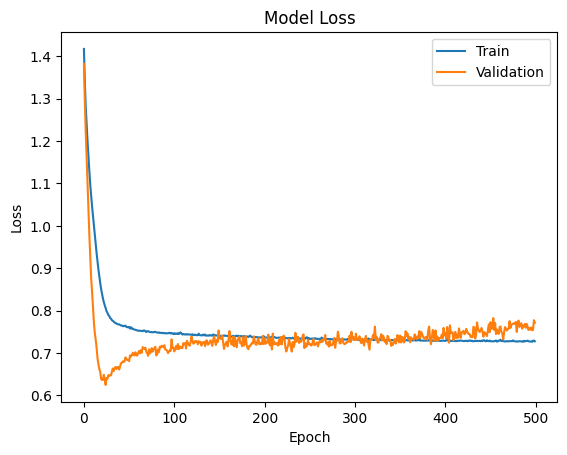

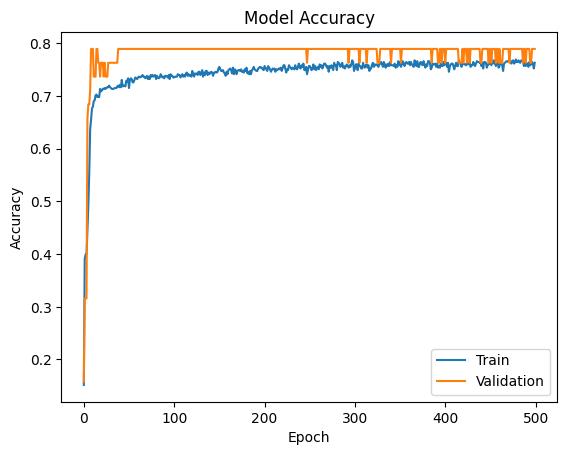

In [17]:
# Displays a graph of changes in loss and accuracy in each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Building ANN models with regularization and dropouts
model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(4,)),
    layers.Dropout(0.5),
    layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#Defines EarlyStopping to stop training if there is no significant improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#Train models with EarlyStopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32, callbacks=[early_stopping])


Epoch 1/500
21/21 [==============================] - 2s 13ms/step - loss: 1.6952 - accuracy: 0.2307 - val_loss: 1.5643 - val_accuracy: 0.1842
Epoch 2/500
21/21 [==============================] - 0s 18ms/step - loss: 1.6118 - accuracy: 0.2895 - val_loss: 1.4752 - val_accuracy: 0.6842
Epoch 3/500
21/21 [==============================] - 0s 14ms/step - loss: 1.5561 - accuracy: 0.3344 - val_loss: 1.4139 - val_accuracy: 0.6842
Epoch 4/500
21/21 [==============================] - 0s 5ms/step - loss: 1.5318 - accuracy: 0.3576 - val_loss: 1.3618 - val_accuracy: 0.6842
Epoch 5/500
21/21 [==============================] - 0s 4ms/step - loss: 1.4721 - accuracy: 0.3978 - val_loss: 1.3138 - val_accuracy: 0.6842
Epoch 6/500
21/21 [==============================] - 0s 5ms/step - loss: 1.4403 - accuracy: 0.4350 - val_loss: 1.2620 - val_accuracy: 0.6842
Epoch 7/500
21/21 [==============================] - 0s 4ms/step - loss: 1.4222 - accuracy: 0.4149 - val_loss: 1.2223 - val_accuracy: 0.6842
Epoch 8/50

In [19]:
#Displays a summary (summary) of the model that has been made.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________


Get Input and Output to Train the Model

In [20]:
#Takes user input related to some attribute or feature related to flight.
def get_input():
    input_duration_of_flight = float(input("Input Duration of Flight: "))
    input_temperature = float(input("Input Temperature: "))
    input_percentage_wind = float(input("Input Percentage Wind: "))
    input_percentage_cloud = float(input("Input Percentage Cloud: "))

    # Merges the inputs into an array or matrix
    X_input = [input_duration_of_flight, input_temperature,
               input_percentage_wind, input_percentage_cloud]
    X_input = np.expand_dims(X_input, axis=0)

    return X_input

In [21]:
X_input = get_input()

# Make predictions with the input obtained
output = model.predict(X_input)

# Using argmax to get the predicted class label
predicted_output = np.argmax(output, axis=1)

label_dict = {
    0: 'On time',
    1: 'Delay (10 - 30 menit)',
    2: 'Delay (30 - 60 menit)',
    3: 'Delay < 10 menit'
}

# Displays the output of the input results
predicted_labels_output = [label_dict[label] for label in predicted_output]

for label, explanation in zip(predicted_output, predicted_labels_output):
    print(f'Status: {label} ({explanation})')

Input Duration of Flight: 80
Input Temperature: 27
Input Percentage Wind: 8
Input Percentage Cloud: 35
1/1 [==============================] - 0s 108ms/step
Status: 1 (Delay (10 - 30 menit))


In [ ]:
# Save model in .h5 format
model.save('flight_model.h5')

Test Data

In [ ]:
#Load model
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/BANGKIT/model.h5')

In [ ]:
#import data test
dt_test = pd.read_csv('/content/drive/MyDrive/BANGKIT/test_myflight_datasets.csv', sep=';')
dt_test.head()

,days,date,time,aircraft_id,airline,airport_dep,airport_arrival,duration_of_flight,temperature,percentage_wind,percentage_cloud
0,Wednesday,24/05/2023,13:43,LNI780,Lion Air,WARR,WAAA,120,27,11,12
1,Wednesday,24/05/2023,12:23,LNI366,Lion Air,WARR,WALL,100,28,4,6
2,Wednesday,24/05/2023,12:16,LNI880,Lion Air,WARR,WAAA,120,28,5,4
3,Wednesday,24/05/2023,12:10,LNI581,Lion Air,WARR,WIII,75,28,5,5
4,Wednesday,24/05/2023,12:06,LNI880,Lion Air,WARR,WAAA,120,28,5,6


In [22]:
#import train dataset
data = pd.read_csv('/content/drive/MyDrive/BANGKIT/myflights_datasets.csv', sep=';')
data.head()

,days,date,time,aircraft_id,airline,airport_dep,airport_arrival,duration_of_flight,temperature,percentage_wind,percentage_cloud,status
0,Tuesday,23/05/2023,23:34,LNI591,Lion Air,WARR,WIII,75,25,10,32,On time
1,Tuesday,23/05/2023,23:28,LNI646,Lion Air,WARR,WADL,60,25,10,32,On time
2,Tuesday,23/05/2023,23:24,LNI708,Lion Air,WARR,WAAA,120,25,10,32,On time
3,Tuesday,23/05/2023,23:14,LNI266,Lion Air,WARR,WALL,100,25,10,32,Delay (10 - 30 menit)
4,Tuesday,23/05/2023,23:07,LNI690,Lion Air,WARR,WATT,125,25,10,32,Delay (10 - 30 menit)


In [23]:
import pandas as pd

def separate_columns(df):
    numerical_cols = df.select_dtypes(include='number').columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    return numerical_cols, categorical_cols
num, nonnum = separate_columns(data)


In [24]:
data['status'].unique()

array(['On time', 'Delay (10 - 30 menit)', 'Delay (30 - 60 menit)',
       'Delay < 10 menit'], dtype=object)

In [25]:
import pandas as pd

def encode_status(df):
    mapping = {
        'On time': 0,
        'Delay (10 - 30 menit)': 1,
        'Delay (30 - 60 menit)': 2,
        'Delay < 10 menit': 3
    }
    encoded_df = df.copy()
    encoded_df['status'] = encoded_df['status'].map(mapping)
    return encoded_df
y_test=encode_status(data)
y_test=y_test['status']
print(y_test)

0      0
1      0
2      0
3      1
4      1
      ..
641    0
642    2
643    1
644    1
645    1
Name: status, Length: 646, dtype: int64


In [ ]:
X_test=dt_test[num]

In [ ]:
X_test=feature_scaling(X_test)

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def feature_scaling(df):
    numerical_cols = df.select_dtypes(include='number').columns.tolist()
    scaler = MinMaxScaler()
    scaled_df = df.copy()

    scaled_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return scaled_df
X_test=feature_scaling(X_test)

In [27]:
# Make predictions using the predict method
predicted_probabilities = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [28]:
# Using argmax to get the predicted class label
predicted_labels = np.argmax(predicted_probabilities, axis=1)

In [29]:
#Give label of status
label_dict = {
    0: 'On time',
    1: 'Delay (10 - 30 menit)',
    2: 'Delay (30 - 60 menit)',
    3: 'Delay < 10 menit'
}

predicted_labels_explanation = [label_dict[label] for label in predicted_labels]

#Shows the output
for label, explanation in zip(predicted_labels, predicted_labels_explanation):
    print(f'Status: {label} ({explanation})')

Status: 1 (Delay (10 - 30 menit))
Status: 0 (On time)
Status: 0 (On time)
Status: 0 (On time)
Status: 0 (On time)
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 0 (On time)
Status: 0 (On time)
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 menit))
Status: 1 (Delay (10 - 30 meni

After building a model and predicting, want to see the correlation between predictor variables

<ipython-input-30-4fdaa4b47dd0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

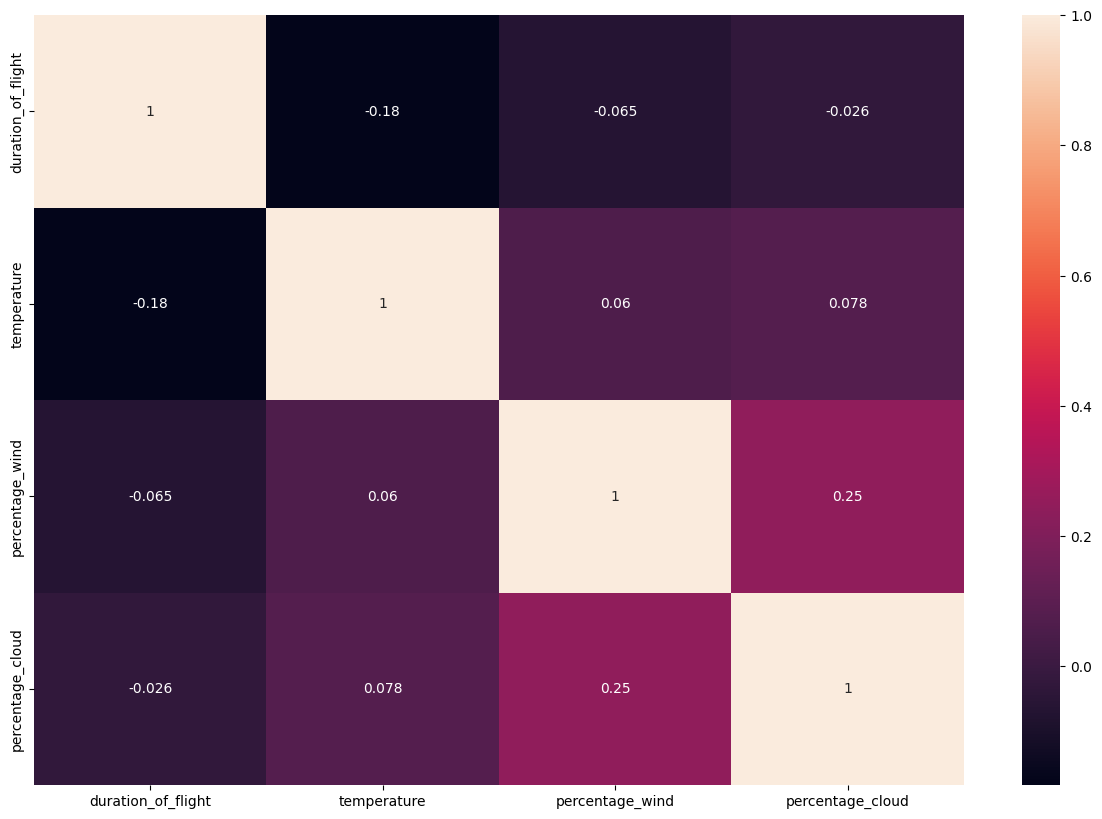

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)